In [5]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import sys
sys.path.append('../src')  # Add the path to where the python scripts are located
from constants import *
from radiative import *
from utils import *
from plot_utils import nice_fonts  

In [9]:
def CalculateStarAndSpot(tau,nTau,area,nu_image,T_hs,Tb_0):
    if tau > 5.0:
        starAndSpot = nBB(nu_image/1E15, pixelAreaRadians, T_hs) #in erg·s−1·cm−2·Hz−1
    else:
#         emission = 0.0
#         tauStep = float(tau/nTau)
#         for i in range(0,nTau):
#             remTau = (float(i)/nTau)*tau
#             emission += np.exp(-remTau)
# #             print(emission,remTau)
# #         print(emission,nu_image,pixelAreaRadians,T_hs,tauStep)
#         emission = emission*nBB(nu_image/1E15, area, T_hs)*tauStep
        starAndSpot = nBB(nu_image/1E15, area, Tb_0)*np.exp(-tau)+(1-np.exp(-tau))*nBB(nu_image/1E15, area, T_hs)
    return starAndSpot
def MakeFigureSpot_I(pixelScale,nPixels,Rs,R_star,tau,nu_image,Tb_0,T_hs,nTau=100):
    fig, ax = plt.subplots()
    plt.title("Spot image at "+str(nu_image/1E9)+" GHz")
    ax.set_xlabel(r'y [mas]')
    ax.set_ylabel(r'x [mas]')
    x = y = np.arange(0,nPixels)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X*X+Y*Y)*pixelScale
    pixelAreaRadians = pixelScale*pixelScale*4.84814E-6*4.84814E-6
    print(pixelAreaRadians,pixelScale)
    starAndSpot = CalculateStarAndSpot(tau,nTau,pixelAreaRadians,nu_image,T_hs,Tb_0)
    I_f = np.where(D > Rs,nBB(nu_image/1E15, pixelAreaRadians, Tb_0),starAndSpot)/mJy
    print(nBB(nu_image/1E15, pixelAreaRadians, Tb_0)/mJy)
    im = ax.imshow(I_f, interpolation=None, cmap=plt.cm.viridis,
               origin='lower', extent=[0.0,pixelScale*int(nPixels),0.0,pixelScale*int(nPixels)],
               vmax=I_f.max(), vmin=0.0)
    fig.colorbar(im, ax=ax,label='Intensity in mJy/pxl')
    plt.show()
def MakeFigureSpot_Tb(pixelScale,nPixels,Rs,R_star,tau,nu_image,Tb_0,T_hs,nTau=100):
    fig, ax = plt.subplots()
    plt.title("Spot image at "+str(nu_image/1E9)+" GHz")
    ax.set_xlabel(r'y [mas]')
    ax.set_ylabel(r'x [mas]')
    x = y = np.arange(0,nPixels)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X*X+Y*Y)*pixelScale
    if tau > 5.0:
        starAndSpot = T_hs
    else:
#         emission = 0.0
#         tauStep = float(tau/nTau)
#         for i in range(0,nTau):
#             remTau = (float(i)/nTau)*tau
#             emission += np.exp(-remTau)
#             print(emission,remTau)
#         emission = emission*T_hs*tauStep
        starAndSpot = Tb_0*np.exp(-tau)+(1. - np.exp(-tau))*T_hs
    Tf = np.where(D > Rs,Tb_0,starAndSpot)
    im = ax.imshow(Tf, interpolation=None, cmap=plt.cm.viridis,
               origin="lower", extent=[0.0,pixelScale*int(nPixels),0.0,pixelScale*int(nPixels)],
               vmax=Tf.max(), vmin=0.0)
    fig.colorbar(im, ax=ax,label='Brightness temp. in K')
    plt.show()

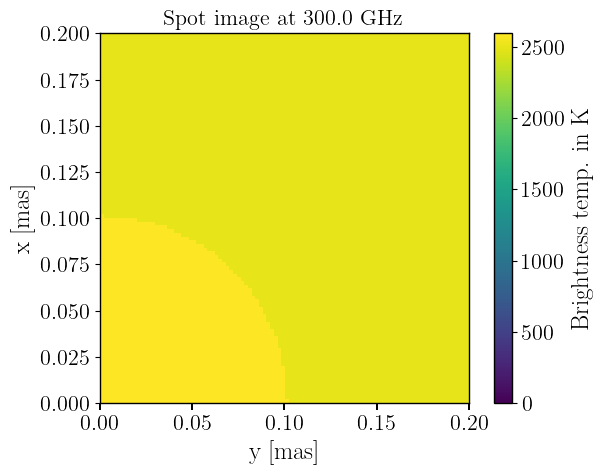

9.401784583839998e-17 0.002
0.6480723245195803


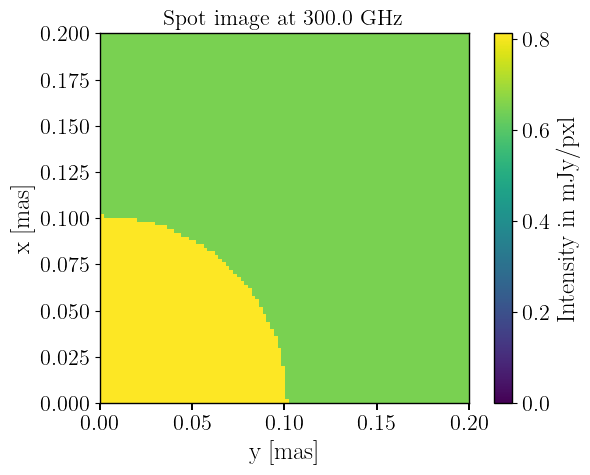

In [10]:
MakeFigureSpot_Tb(0.002,100,0.1,1.0,0.1,3.0E11,2500.0,3500.0)
MakeFigureSpot_I(0.002,100,0.1,1.0,1.0,3.0E11,2500.0,3500.0)